## DSC 550 Term Project Employee Retention Scroggins Jonathon

### Milestone 1

I believe the saying goes, “Good help is hard to find”. Even though it seems like there are not enough jobs out there, I feel like I am always seeing signs posted at businesses that they are hiring. There could be many reasons for the need to hire more people from expanding the business, seasonal rushes, or just standard employee turnover. Sometimes these reasons for hiring can sneak up on a business especially employee turnover. It is usually not the goal of a business to hire someone just to let them go. Most businesses hire an individual with the hope that they will be employed for a long time. There are many factors that can lead to employees leaving a company. The question I would ask then would be, is there a way to predict if an employee might leave and therefor put into place a way to retain that employee or at least predict that the spot would need to be filled before it is too late. 
To explore this question, I will be using the data set HR Employee Analytics found here https://www.kaggle.com/kmldas/hr-employee-data-descriptive-analytics. This dataset has the following variables:
1)	Emp_Id                  
2)	satisfaction_level  - percent as a decimal     
3)	last_evaluation     - Time from last evaluation in years     
4)	number_project  - Number of projects employee is working on            
5)	average_montly_hours – Average hours worked last 3 months       
6)	time_spend_company  - Commute time for employee        
7)	Work_accident    -           
8)	left  - Whether or not the employee has left the company                      
9)	promotion_last_5years -      
10)	Department               
11)	salary 


In [1]:
import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sb
import numpy as np

In [2]:
#import dataframe
emp_df = pd.read_excel('HR_Employee_Data.xlsx')

In [3]:
emp_df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
emp_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
emp_df.describe(include=['O'])

,Emp_Id,Department,salary
count,14999,14999,14999
unique,14999,10,3
top,IND32798,sales,low
freq,1,4140,7316


In [6]:
emp_df.dtypes

Emp_Id                    object
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [7]:
emp_df.shape

(14999, 11)

### Histograms

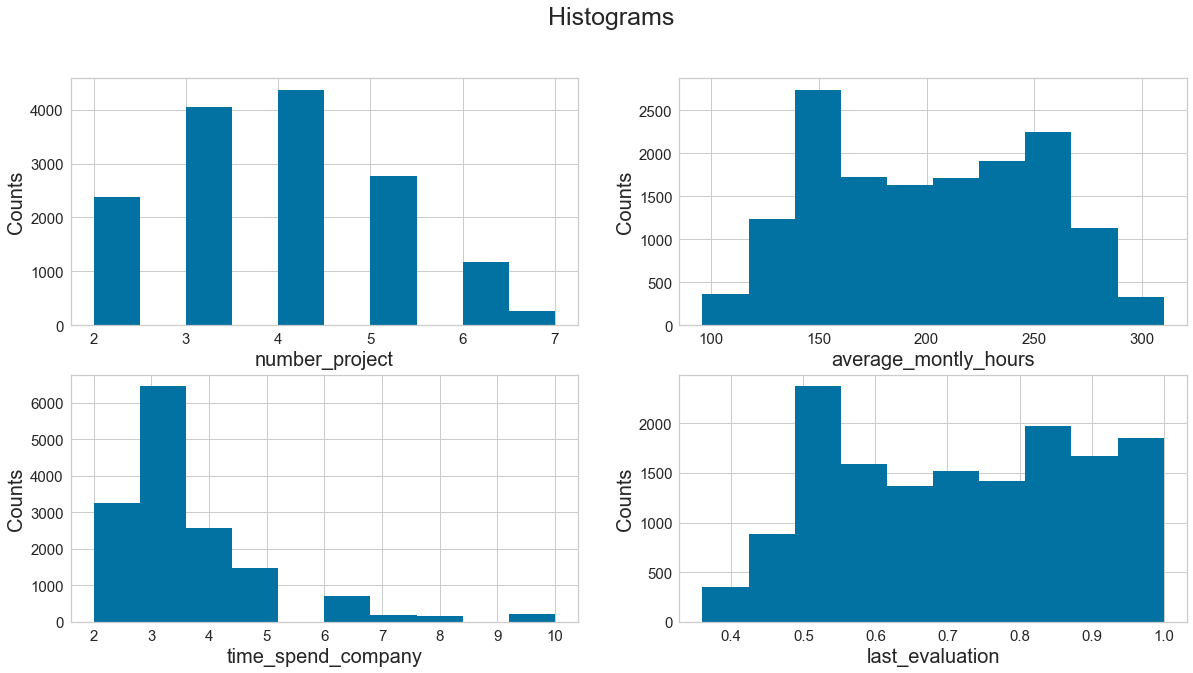

In [8]:
#plotting histograms
plt.rcParams['figure.figsize'] = (20,10) 
#set up histograms
fig, axes = plt.subplots(nrows= 2, ncols = 2)
num_features = ['number_project', 'average_montly_hours', 'time_spend_company', 'last_evaluation']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']
#draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(emp_df[num_features[idx]].dropna()) 
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
fig.suptitle('Histograms', fontsize=25)
plt.show()

*Looking at these histograms the one that sticks out to me is the time_spend_company histogram. It is skewed to the left so I will need to look at the boxplot and check more for outliers and see if I should drop some values for the model. The other histograms looked like a good spread for the analysis and model building at this time*

### Bar Charts

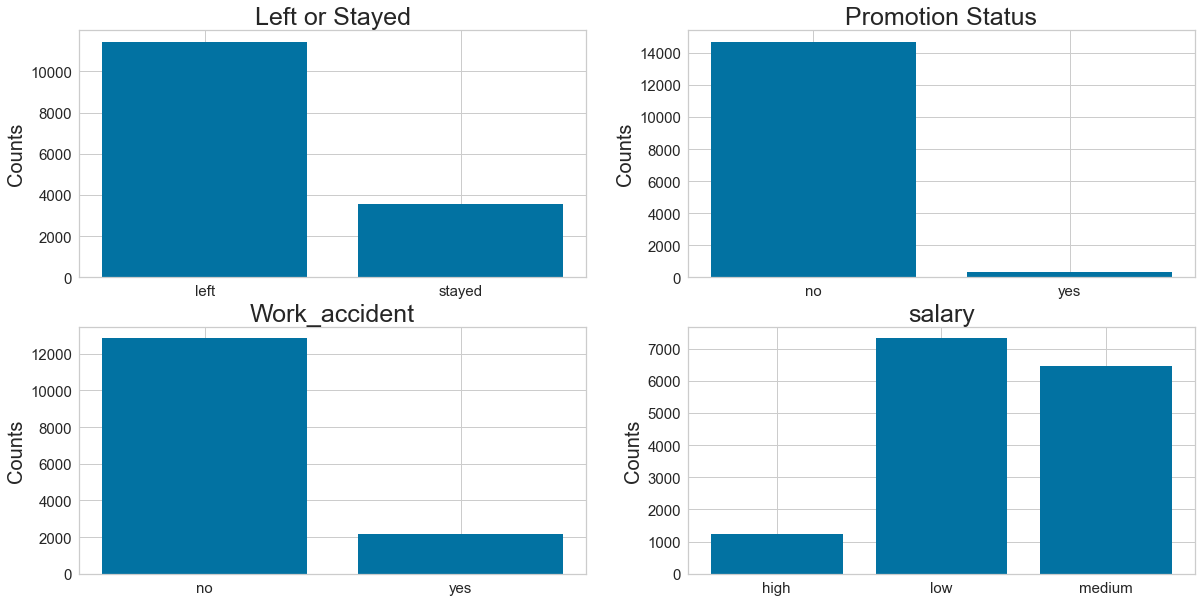

In [9]:
#plotting barcharts
plt.rcParams['figure.figsize'] = (20,10) 
#set up barcharts
#Bar chart for left
fig, axes = plt.subplots(nrows= 2, ncols = 2)
X_left = emp_df.replace({'left':{1:'left', 0:'stayed'}}).groupby('left').size().reset_index(name='Counts')['left']
Y_left = emp_df.replace({'Netflix':{1:'left', 0:'stayed'}}).groupby('left').size().reset_index(name='Counts')['Counts']
axes[0,0].bar(X_left, Y_left) 
axes[0,0].set_title('Left or Stayed', fontsize = 25)
axes[0,0].set_ylabel('Counts', fontsize = 20)
axes[0,0].tick_params(axis='both', labelsize = 15)

#Bar chart for Promotion status
X_promotion_last_5years = emp_df.replace({'promotion_last_5years':{1:'yes', 0:'no'}}).groupby('promotion_last_5years').size().reset_index(name='Counts')['promotion_last_5years']
Y_promotion_last_5years = emp_df.replace({'promotion_last_5years':{1:'yes', 0:'no'}}).groupby('promotion_last_5years').size().reset_index(name='Counts')['Counts']
axes[0,1].bar(X_promotion_last_5years, Y_promotion_last_5years) 
axes[0,1].set_title('Promotion Status', fontsize = 25)
axes[0,1].set_ylabel('Counts', fontsize = 20)
axes[0,1].tick_params(axis='both', labelsize = 15)

#Bar chart for Department
X_Work_accident = emp_df.replace({'Work_accident':{1:'yes', 0:'no'}}).groupby('Work_accident').size().reset_index(name='Counts')['Work_accident']
Y_Work_accident = emp_df.replace({'Work_accident':{1:'yes', 0:'no'}}).groupby('Work_accident').size().reset_index(name='Counts')['Counts']
axes[1,0].bar(X_Work_accident, Y_Work_accident)
axes[1,0].set_title('Work_accident', fontsize = 25)
axes[1,0].set_ylabel('Counts', fontsize = 20)
axes[1,0].tick_params(axis='both', labelsize = 15)

#Bar chart for salary
X_salary = emp_df.groupby('salary').size().reset_index(name='Counts')['salary']
Y_salary = emp_df.groupby('salary').size().reset_index(name='Counts')['Counts']
axes[1,1].bar(X_salary, Y_salary) 
axes[1,1].set_title('salary', fontsize = 25)
axes[1,1].set_ylabel('Counts', fontsize = 20)
axes[1,1].tick_params(axis='both', labelsize = 15)

plt.show()

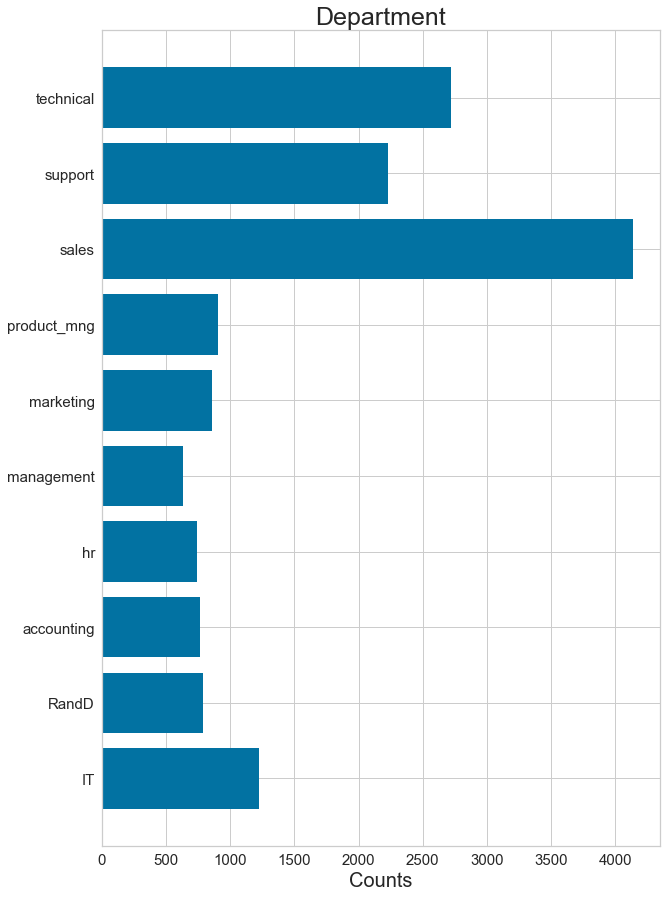

In [10]:
plt.rcParams['figure.figsize'] = (10,15) 
fig, axes = plt.subplots(nrows= 1, ncols = 1)
X_Dept = emp_df.groupby('Department').size().reset_index(name='Counts')['Department']
Y_Dept = emp_df.groupby('Department').size().reset_index(name='Counts')['Counts']
axes.barh(X_Dept, Y_Dept)
axes.set_title('Department', fontsize = 25)
axes.set_xlabel('Counts', fontsize = 20)
axes.tick_params(axis='both', labelsize = 15)

plt.show()

*Looking at the bar graphs, I do notice that there is a good spread of the departments which will help in the model. I do also however notice that the spread of the other variables is not as good. It will be interesting to see their effect on the model and whether they are a strong indicator of staying or going.*

### Scatter Plot

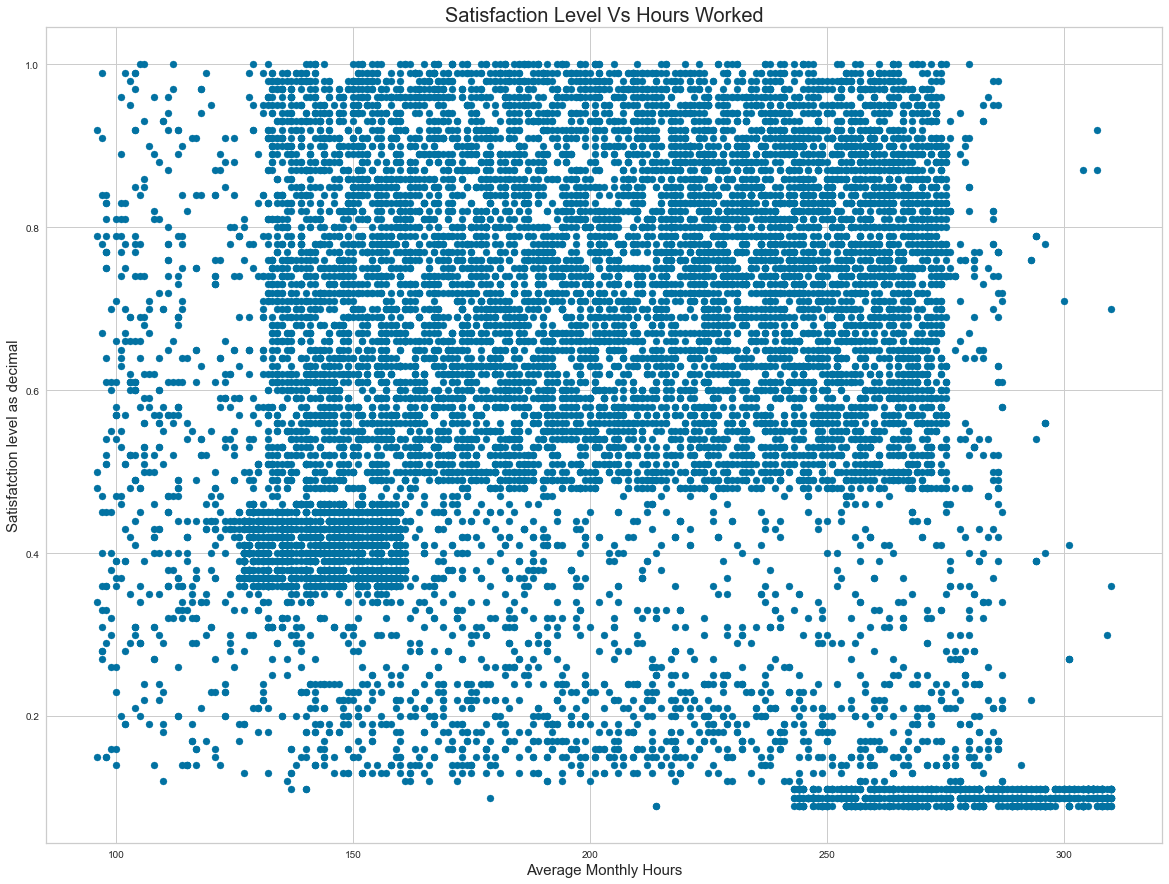

In [11]:
plt.rcParams['figure.figsize'] = (20,15) 
fig, axes = plt.subplots(nrows= 1, ncols = 1)
axes.scatter(emp_df['average_montly_hours'], emp_df['satisfaction_level'])
axes.set_xlabel('Average Monthly Hours', size = 15)
axes.set_ylabel('Satisfatction level as decimal', size = 15)
axes.set_title('Satisfaction Level Vs Hours Worked', size = 20)
plt.show()

*This is an interesting plot to me. I wanted to see if there was any kind of correlation between the Average monthly hours worked and the level of satisfaction. What I notice here is that there seem to be som groupings that I did not expect. It looks liek the higher satisfaction levels occur more frequently in the range of 100-250 hours worked and the lower satiisfaction is grouped in the higher average monthly hours.*

### Pearson Ranking Chart

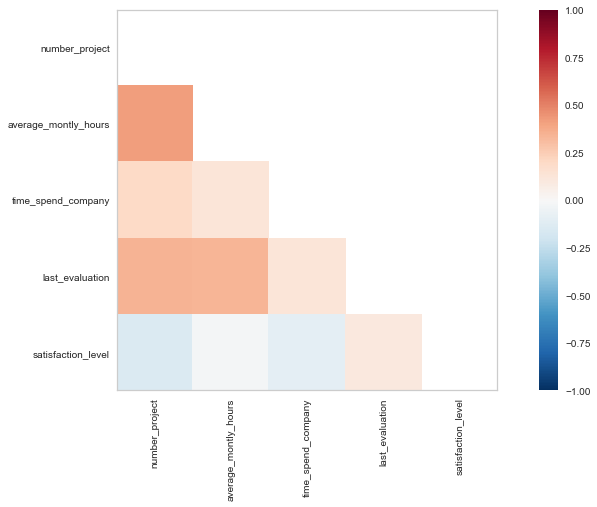

In [12]:
#Pearson Ranking charts
plt.rcParams['figure.figsize'] = (15,7)
from yellowbrick.features import Rank2D
num_features2 = ['number_project', 'average_montly_hours', 'time_spend_company', 'last_evaluation', 'satisfaction_level']
X= emp_df[num_features2]
visulizer = Rank2D(algorithm='pearson')
visulizer.fit(X)
visulizer.transform(X)
plt.show()

*This visualization indicates that there is not a strong correlation between many of the variables here. It does show a negative correlation between the amount of projects, time spent commuting and satisfaction level which makes sense to me the more work you are doing and the longer the communte the less hapy you are.*

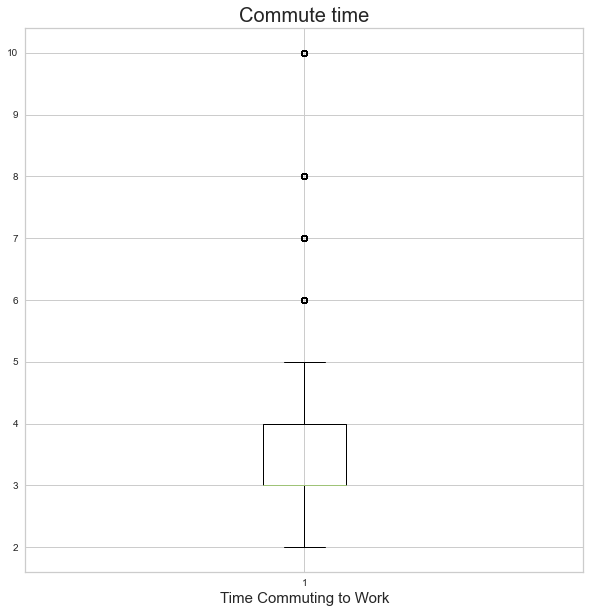

In [13]:
plt.rcParams['figure.figsize'] = (10,10) 
fig, axes = plt.subplots(nrows= 1, ncols = 1)
axes.boxplot(emp_df['time_spend_company'])
axes.set_xlabel('Time Commuting to Work', fontsize = 15)
axes.set_title('Commute time', fontsize = 20)
plt.show()

*Looking at the box plot as I mentioned above, it does look like there are outliers in the commute times, so I will most likely drop some of those outliers*

## Milestone 2 begins here

In [14]:
#dropping Employee ID
emp_df = emp_df.drop(['Emp_Id'], axis=1)

*I am dropping the Employee ID as I do not feel it is usefull for the model*

In [15]:
#looking at null values
emp_df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

*There are no null values so I will move forward*

In [16]:
#convert categorical data
cat_features = ['Department', 'salary']
emp_df_cat = emp_df[cat_features]
emp_df_cat_dummies = pd.get_dummies(emp_df_cat)
emp_df_cat_dummies.head()

,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [17]:
#combine to one dataframe
emp_df = pd.concat([emp_df, emp_df_cat_dummies], axis=1)
emp_df.head(8)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
5,0.41,0.50,2,153,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
6,0.10,0.77,6,247,4,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
7,0.92,0.85,5,259,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


*Decided to make dummy variables for the categorical variables for use when making the model. This will help to see how the categorical variables will effect the model. I then concated the dataframes into ine datframe for analysis*

In [18]:
emp_df_outliers = emp_df[(emp_df['time_spend_company'] > 5)]
emp_df_outliers

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
17,0.78,0.99,4,255,6,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
34,0.84,0.87,4,246,6,0,1,0,hr,low,...,1,0,0,0,0,0,0,0,1,0
47,0.57,0.70,3,273,6,0,1,0,support,low,...,0,0,0,0,0,1,0,0,1,0
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14942,0.20,0.50,5,135,6,0,1,0,RandD,low,...,0,0,0,0,0,0,0,0,1,0
14947,0.91,0.98,4,242,6,0,1,0,support,low,...,0,0,0,0,0,1,0,0,1,0
14977,0.81,0.85,4,251,6,0,1,0,hr,medium,...,1,0,0,0,0,0,0,0,0,1
14986,0.85,0.85,4,247,6,0,1,0,technical,low,...,0,0,0,0,0,0,1,0,1,0


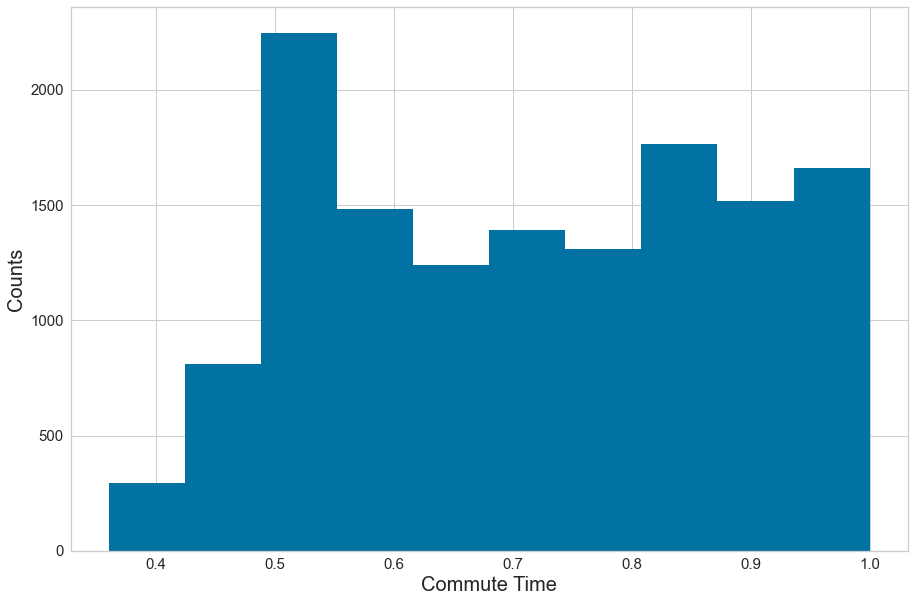

In [19]:
#dropping outliers of Commute time
emp_df = emp_df[(emp_df['time_spend_company'] <= 5)]
plt.rcParams['figure.figsize'] = (15,10) 
fig, axes = plt.subplots(nrows= 1, ncols = 1)
axes.hist(emp_df[num_features[idx]].dropna()) 
axes.set_xlabel('Commute Time', fontsize=20)
axes.set_ylabel('Counts', fontsize=20)
axes.tick_params(axis='both', labelsize=15)

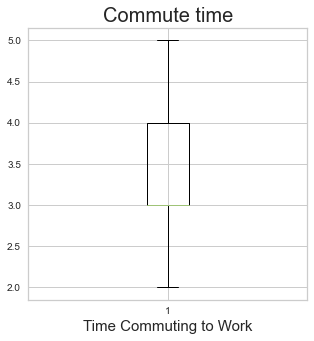

In [20]:
plt.rcParams['figure.figsize'] = (5,5) 
fig, axes = plt.subplots(nrows= 1, ncols = 1)
axes.boxplot(emp_df['time_spend_company'])
axes.set_xlabel('Time Commuting to Work', fontsize = 15)
axes.set_title('Commute time', fontsize = 20)
plt.show()

In [21]:
emp_df.shape

(13717, 23)

*Dropping values above 5 for the commute variable to fix the skewness of the spread of the data. I feel this will make a better model and not be influenced by outliers. This is the only variable that I feel at this time has outliers that need to be explored*

In [22]:
emp_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
count,13717.000000,13717.000000,13717.000000,13717.000000,13717.000000,13717.000000,13717.000000,13717.000000,13717.000000,13717.000000,...,13717.000000,13717.000000,13717.000000,13717.000000,13717.000000,13717.000000,13717.000000,13717.000000,13717.000000,13717.000000
mean,0.611729,0.714338,3.783116,200.592768,3.164686,0.141576,0.245097,0.017497,0.082890,0.053583,...,0.050448,0.035576,0.055770,0.060290,0.272581,0.151782,0.185172,0.077422,0.497995,0.424583
std,0.248126,0.170571,1.243583,49.915380,0.908507,0.348628,0.430161,0.131117,0.275726,0.225201,...,0.218876,0.185238,0.229486,0.238032,0.445304,0.358823,0.388451,0.267270,0.500014,0.494298
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,198.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.810000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Milestone 3 begins here

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from IPython.display import Image
from sklearn import tree
import pydotplus
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [24]:
list(emp_df.columns)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary',
 'Department_IT',
 'Department_RandD',
 'Department_accounting',
 'Department_hr',
 'Department_management',
 'Department_marketing',
 'Department_product_mng',
 'Department_sales',
 'Department_support',
 'Department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [25]:
emp_df_model_features = ['number_project', 'average_montly_hours', 'time_spend_company', 'last_evaluation',
                         'Work_accident', 'satisfaction_level', 'promotion_last_5years', 'Department_IT','Department_RandD',
                         'Department_accounting','Department_hr','Department_management','Department_marketing',
                         'Department_product_mng','Department_sales','Department_support','Department_technical','salary_high','salary_low',
                         'salary_medium' ]
emp_df_model_features_df = emp_df[emp_df_model_features]
emp_df_model_target = emp_df['left']

In [26]:
#train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(emp_df_model_features_df, emp_df_model_target, test_size = 0.3, random_state = 11)

In [27]:
print('The number of samples in the trianing set is: ', X_train.shape[0])
print('The number of samples in the validation set is: ', X_test.shape[0])

The number of samples in the trianing set is:  9601
The number of samples in the validation set is:  4116


In [28]:
print('Stayed vs Left in training set: ', y_train.value_counts())
print('Stayed vs Left in validation set: ', y_test.value_counts())

Stayed vs Left in training set:  0    7269
1    2332
Name: left, dtype: int64
Stayed vs Left in validation set:  0    3086
1    1030
Name: left, dtype: int64


#### *Decision Tree Classifier*

In [29]:
emp_tree = DecisionTreeClassifier()
emp_tree = emp_tree.fit(X_train, y_train)
y_predict = emp_tree.predict(X_test)
print('Accuracy of the model is: ', round(metrics.accuracy_score(y_test, y_predict), 2))

Accuracy of the model is:  0.97


In [30]:
dot_data = tree.export_graphviz(emp_tree, out_file=None, feature_names=emp_df_model_features, 
                              class_names=['Stayed', 'Left'])

In [31]:
graph = pydotplus.graph_from_dot_data(dot_data)

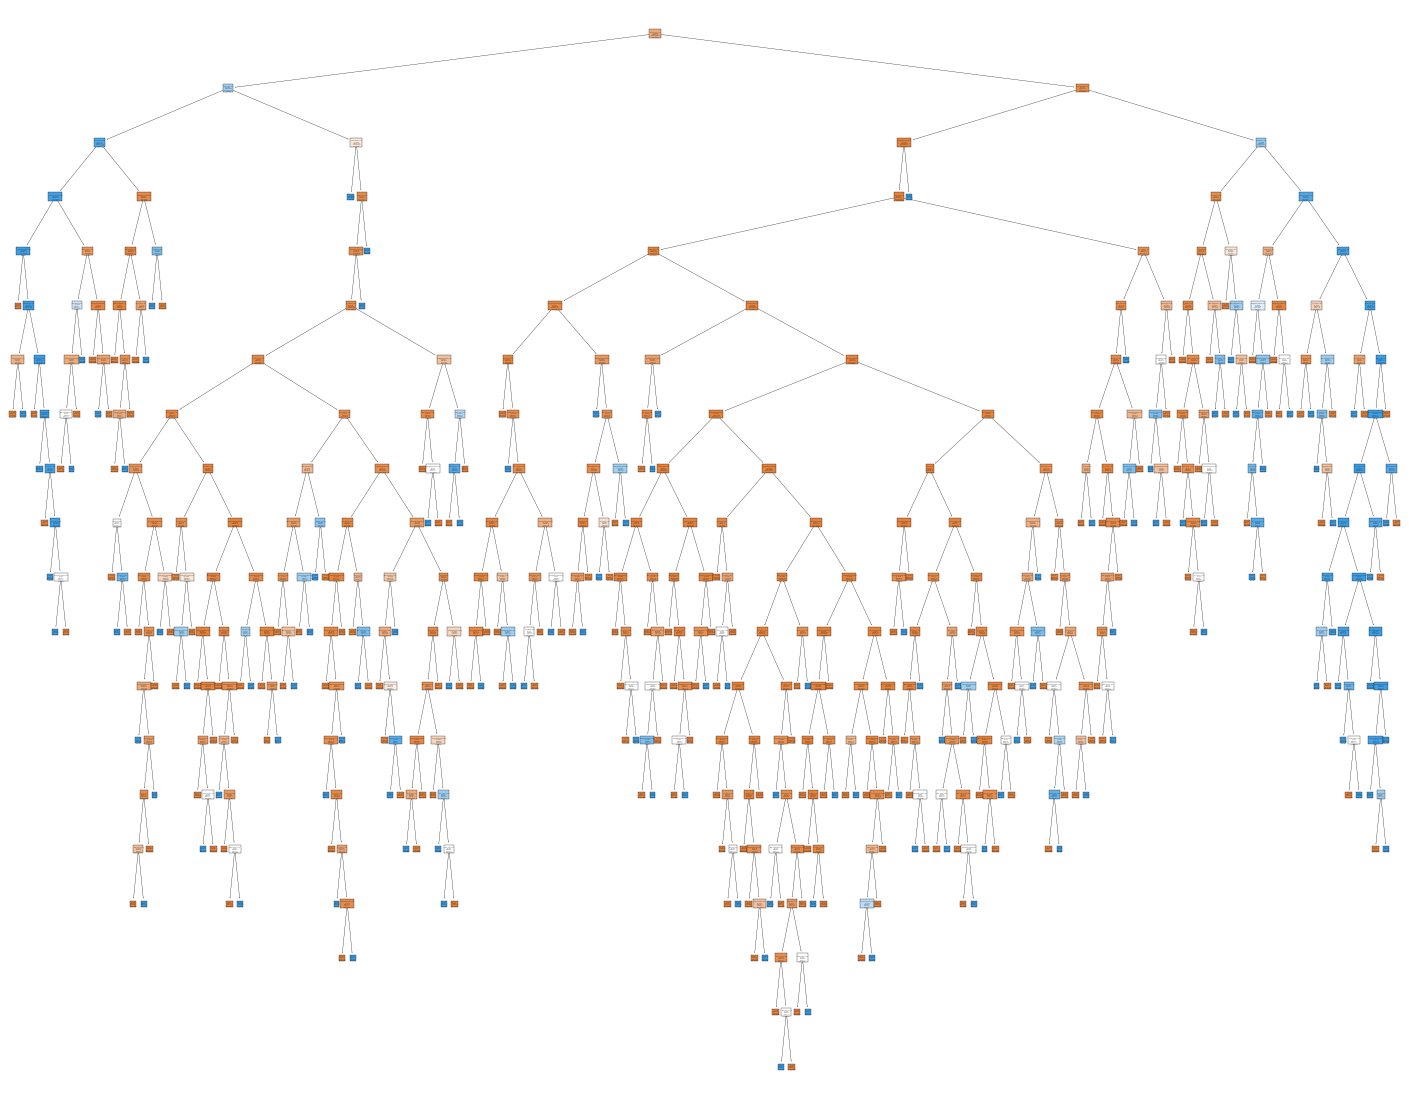

In [32]:
#printing a graph of the decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(emp_tree, 
                   feature_names=emp_df_model_features,  
                   class_names=['Stayed', 'Left'],
                   filled=True)

In [33]:
fig.savefig("decision_tree.png")

The confusion matrix score is:  0.97


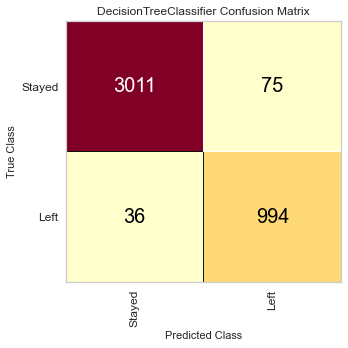

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [34]:
cm_tree = ConfusionMatrix(emp_tree, classes=['Stayed', 'Left'])
cm_tree.fit(X_train, y_train)
score = cm_tree.score(X_test, y_test)
print('The confusion matrix score is: ', round(score, 2))
for label in cm_tree.ax.texts:
    label.set_size(20)
cm_tree.poof()

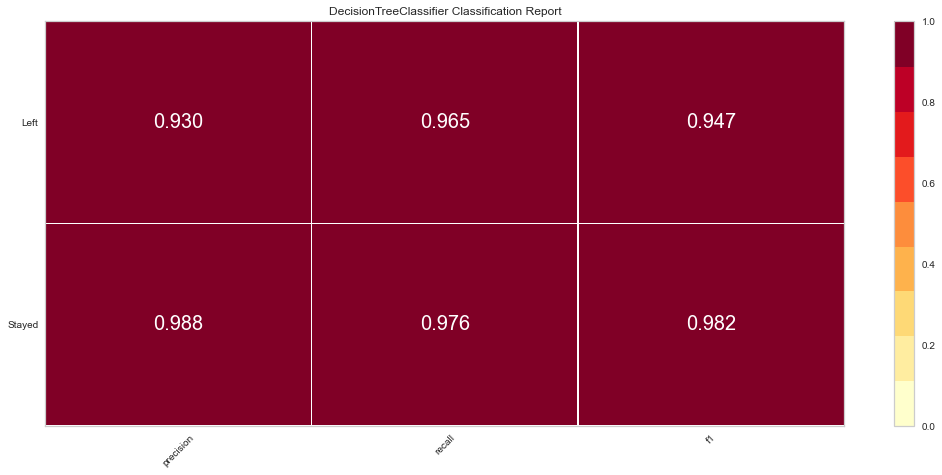

In [35]:
#Precision, Recall and F1
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 20
visualizer_tree = ClassificationReport(emp_tree, classes = ['Stayed', 'Left'])
visualizer_tree.fit(X_train, y_train)
visualizer_tree.score(X_test, y_test)
g=visualizer_tree.poof()

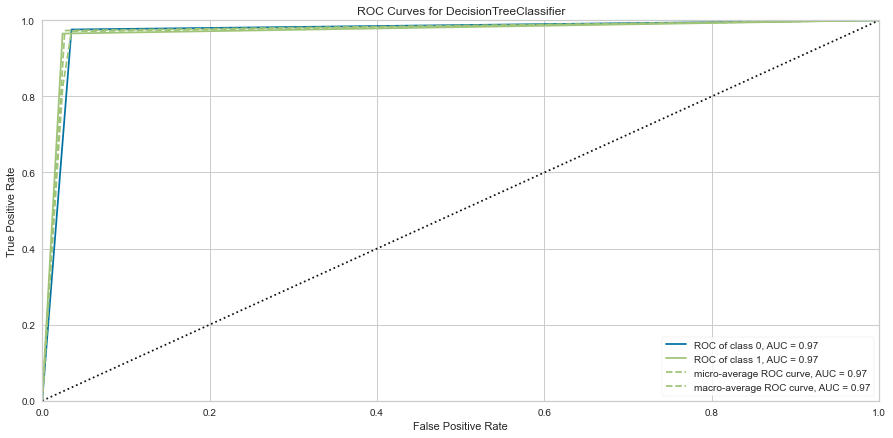

In [36]:
visual_tree = ROCAUC(emp_tree)
visual_tree.fit(X_train, y_train)
visual_tree.score(X_test, y_test)
g=visual_tree.poof()

Feature: 0, Score: 0.09138
Feature: 1, Score: 0.06738
Feature: 2, Score: 0.16718
Feature: 3, Score: 0.10100
Feature: 4, Score: 0.00109
Feature: 5, Score: 0.54858
Feature: 6, Score: 0.00001
Feature: 7, Score: 0.00184
Feature: 8, Score: 0.00032
Feature: 9, Score: 0.00058
Feature: 10, Score: 0.00046
Feature: 11, Score: 0.00036
Feature: 12, Score: 0.00053
Feature: 13, Score: 0.00050
Feature: 14, Score: 0.00196
Feature: 15, Score: 0.00306
Feature: 16, Score: 0.00556
Feature: 17, Score: 0.00149
Feature: 18, Score: 0.00343
Feature: 19, Score: 0.00328


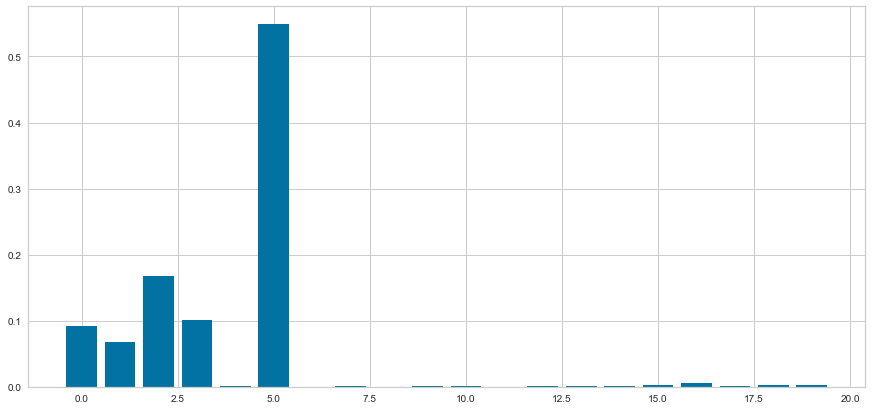

In [37]:
importance=emp_tree.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### *I decided to start by using a decision tree classifier for this data set. I felt like I could build a good prediction tool with this model. Based on the results at this time, the model is 98% accurate and gets good scores. However, I will have to go back and look at the model and make sure that is not due to overfitting which can be a problem with this type of classifier. This model does indicate the one of the most important features of the model is the satisfaction level of the employee. I thought this model would be a good way to see the path that decisions take when being retaind or leaving in order to see what might most influence the decision and help to make changes where needed.*

#### *Logistic Regression Model*

The confusion matrix score is:  0.83


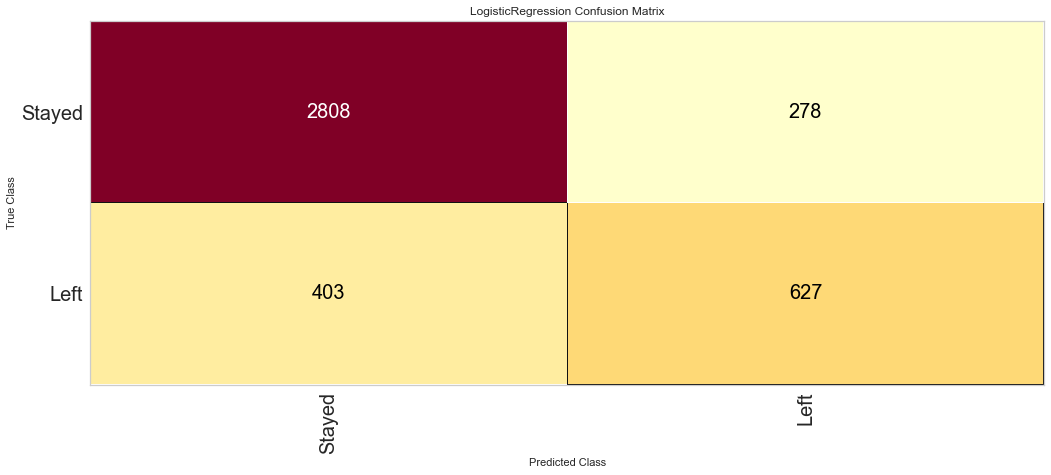

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [38]:
emp_log_model = LogisticRegression(max_iter=500)
cm = ConfusionMatrix(emp_log_model, classes=['Stayed', 'Left'])
cm.fit(X_train, y_train)
score = cm.score(X_test, y_test)
print('The confusion matrix score is: ', round(score, 2))
for label in cm.ax.texts:
    label.set_size(20)
cm.poof()

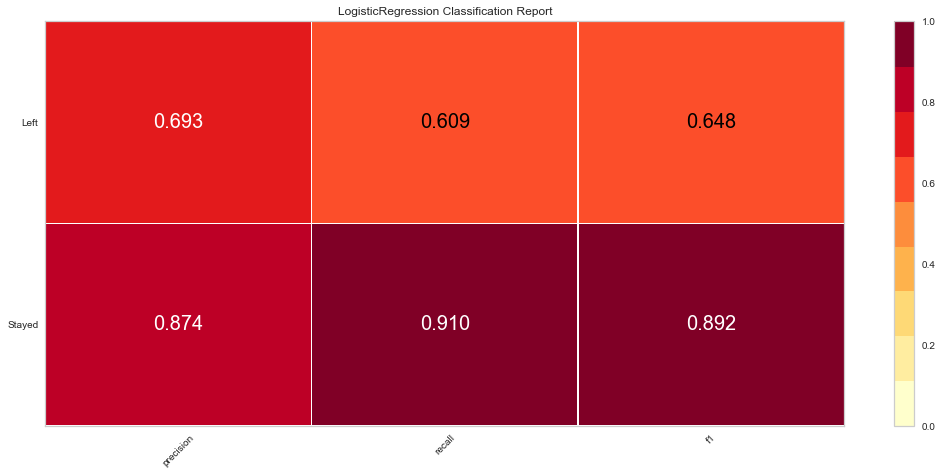

In [39]:
#Precision, Recall and F1
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 20
visualizer = ClassificationReport(emp_log_model, classes = ['Stayed', 'Left'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g=visualizer.poof()

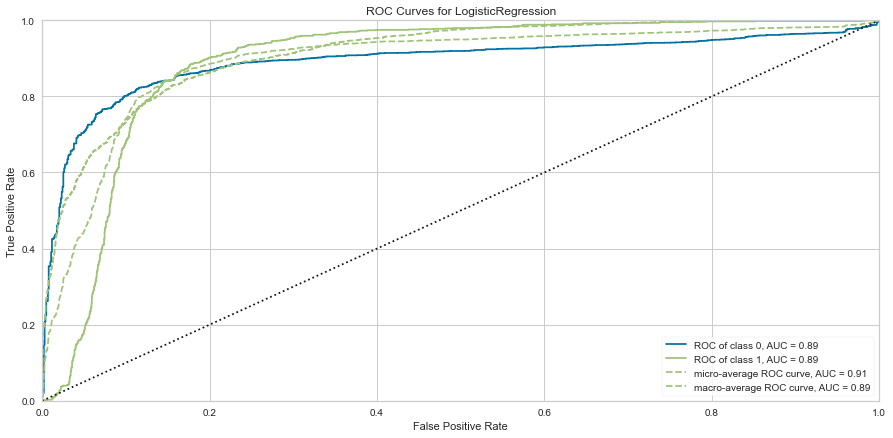

In [40]:
#ROC and AUC
visual = ROCAUC(emp_log_model)
visual.fit(X_train, y_train)
visual.score(X_test, y_test)
g=visual.poof()

Feature: 0, Score: -0.58697
Feature: 1, Score: 0.00355
Feature: 2, Score: 1.23193
Feature: 3, Score: -0.09111
Feature: 4, Score: -1.73605
Feature: 5, Score: -4.88873
Feature: 6, Score: -0.58623
Feature: 7, Score: -0.03296
Feature: 8, Score: -0.57510
Feature: 9, Score: -0.06070
Feature: 10, Score: 0.03089
Feature: 11, Score: -0.32772
Feature: 12, Score: 0.15411
Feature: 13, Score: -0.25831
Feature: 14, Score: 0.04100
Feature: 15, Score: 0.00078
Feature: 16, Score: 0.14313
Feature: 17, Score: -1.08210
Feature: 18, Score: 0.32230
Feature: 19, Score: -0.12509


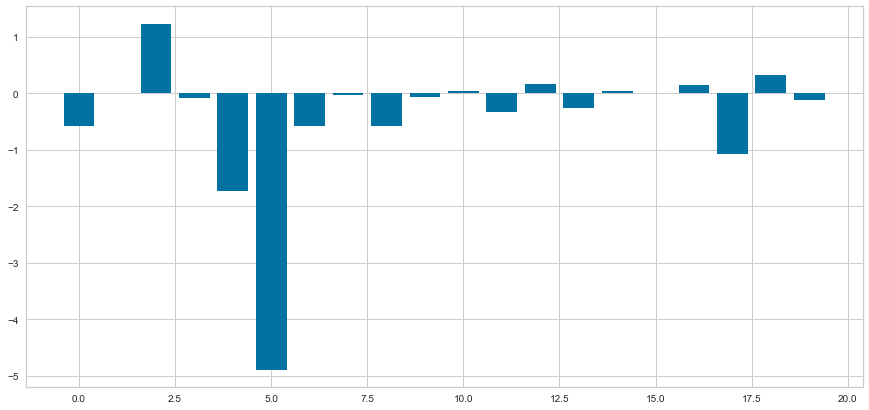

In [41]:
importance=emp_log_model.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### *I then decided to do a Logistic regression model to see if that would be a good model as well. The model is 83% accurate which is a good model. The other scores are good as well. The scores are better for the retention of employees which is a good sign. Again it shows one of the most influential features is the satisfaction level of the employee. I chose to llok at a logistic regression model to see if I could see if there were featuires that would significantly influence the outcome of the employee whether they stayed or left.*

## *So far I would say that the insights gained are that the most significant feature for retention of an employee is their satisfaction level. I thought that whether they had been evaluated or promoted recently would have had a bigger impact than they do but according to these models eventhough they would be considered significant, they are not as significant as I was expecting. Both of these models show to be good prediction tools for this data set, however, as I mentioned before the Tree model may suffer from overfitting and I would need to evaluate that further. I would also want to look at other models like clustering and KNN to see if they would build good models as well as a comparison tool to see which is the best tool. The other interesting thing to me is that in full disclosure I had not put the department or salary variables into the model yet and it did not effect the results when I added them in as much as I would have expected. I will want to run a few more models with just the features that seem to be the most significant next week.*

### Milestone 4

### Random Forrest Classifier

In [42]:
emp_rf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [43]:
emp_rf_model = emp_rf.fit(X_train, y_train)

The confusion matrix score is:  0.99


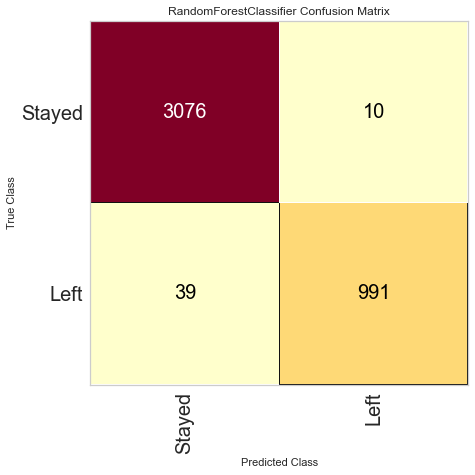

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [63]:
plt.rcParams['figure.figsize'] = (7,7)
cm_rf = ConfusionMatrix(emp_rf_model, classes=['Stayed', 'Left'])
cm_rf.fit(X_train, y_train)
score_rf = cm_rf.score(X_test, y_test)
print('The confusion matrix score is: ', round(score_rf, 2))
for label in cm_rf.ax.texts:
    label.set_size(20)
cm_rf.poof()

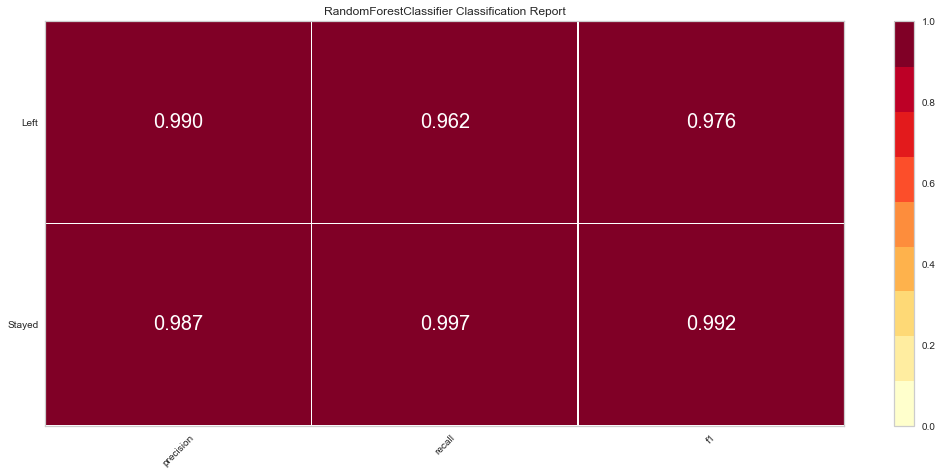

In [45]:
#Precision, Recall and F1
plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams['font.size'] = 20
visualizer = ClassificationReport(emp_rf_model, classes = ['Stayed', 'Left'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g=visualizer.poof()

Feature: 0, Score: 0.18874
Feature: 1, Score: 0.14716
Feature: 2, Score: 0.17711
Feature: 3, Score: 0.11468
Feature: 4, Score: 0.01052
Feature: 5, Score: 0.32901
Feature: 6, Score: 0.00103
Feature: 7, Score: 0.00162
Feature: 8, Score: 0.00161
Feature: 9, Score: 0.00172
Feature: 10, Score: 0.00144
Feature: 11, Score: 0.00108
Feature: 12, Score: 0.00122
Feature: 13, Score: 0.00103
Feature: 14, Score: 0.00333
Feature: 15, Score: 0.00279
Feature: 16, Score: 0.00350
Feature: 17, Score: 0.00368
Feature: 18, Score: 0.00547
Feature: 19, Score: 0.00324


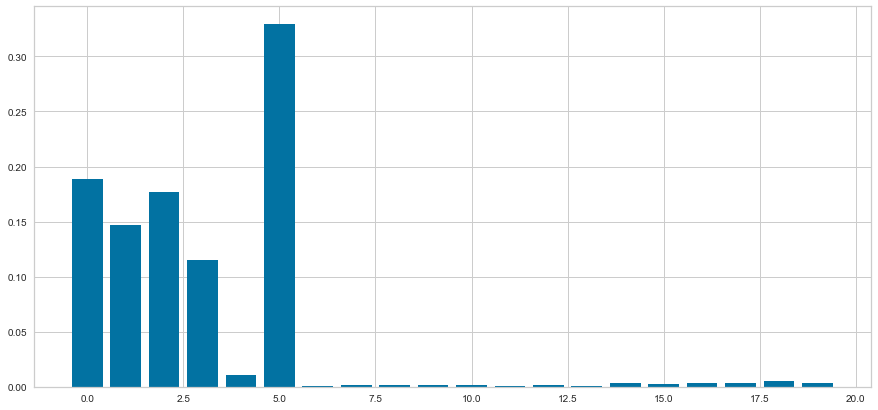

In [46]:
rf_importance=emp_rf_model.feature_importances_
for i,v in enumerate(rf_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(rf_importance))], rf_importance)
plt.show()

In [47]:
emp_rf_model.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855),
 DecisionTreeClassifier(max_features='auto', random_state=1819583497),
 DecisionTreeClassifier(max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_features='auto', random_state=626610453),
 DecisionTreeClassifier(max_features='auto', random_state=1650906866),
 DecisionTreeClassifier(max_features='auto', random_state=1879422756),
 DecisionTreeClassifier(max_features='auto', random_state=1277901399),
 DecisionTree

In [48]:
print(len(emp_rf_model.estimators_))

100


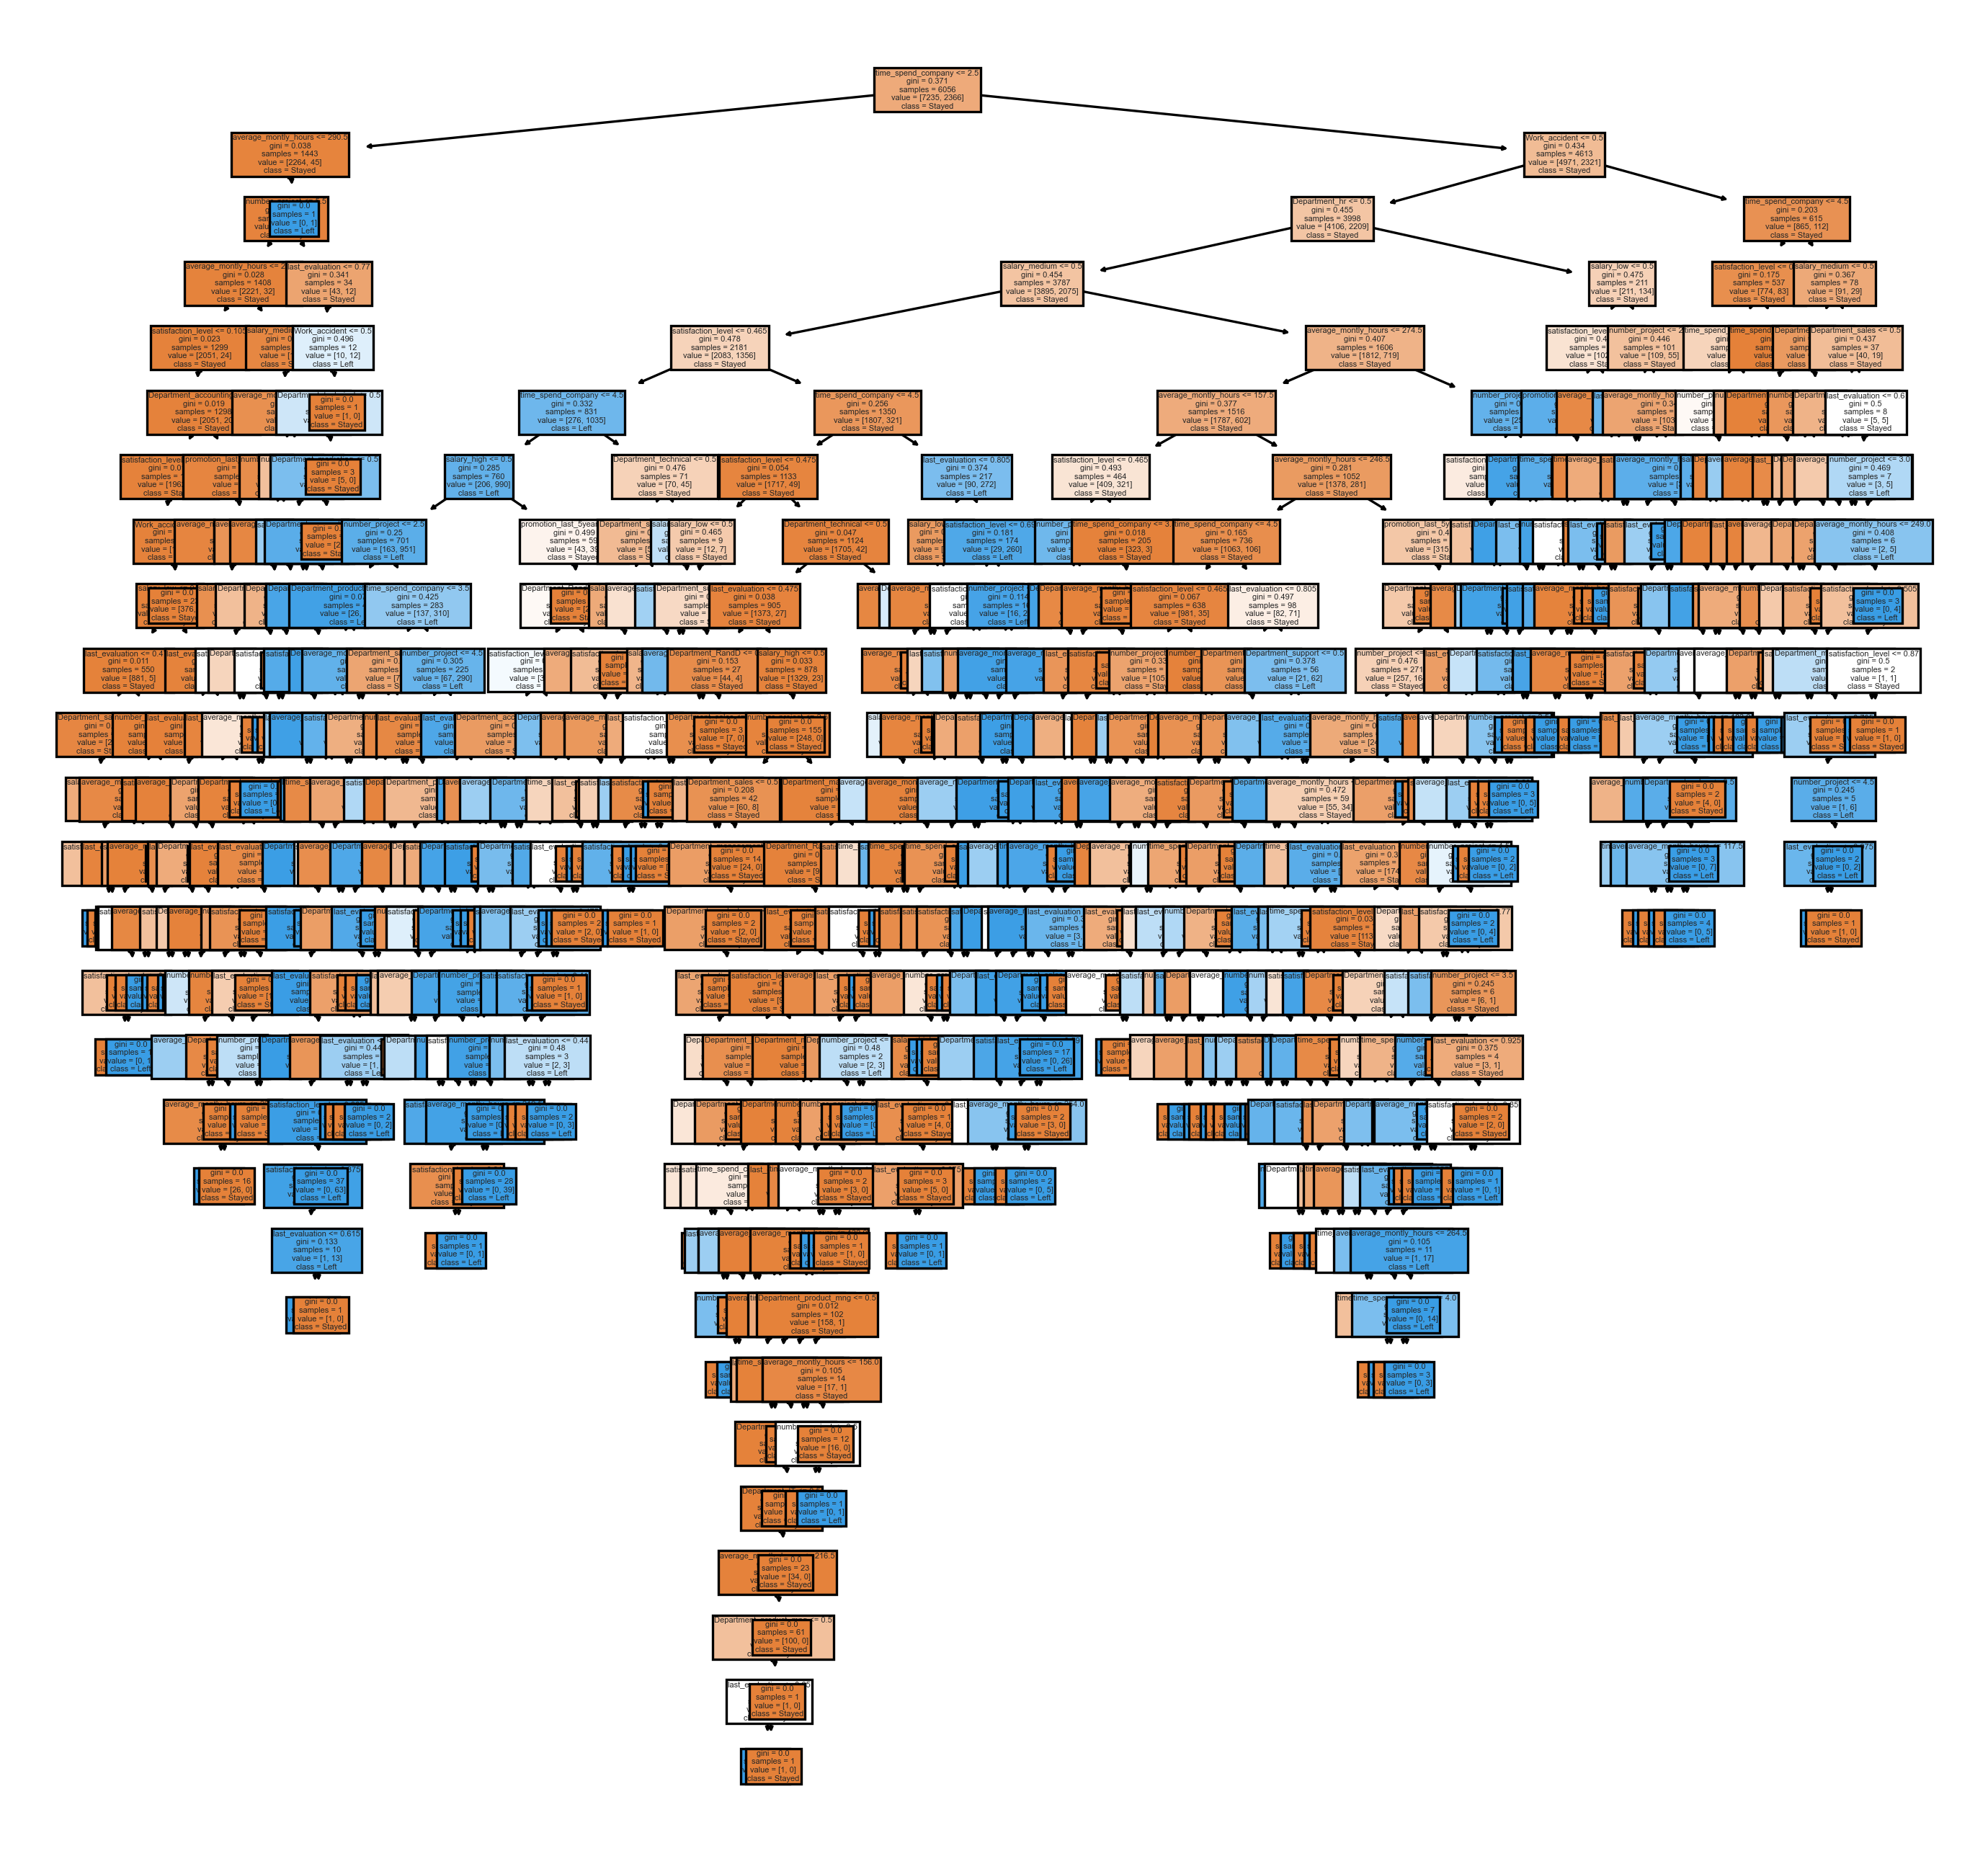

In [49]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(emp_rf_model.estimators_[0],
               feature_names=emp_df_model_features,  
               class_names=['Stayed', 'Left'],
               filled = True);
plt.show()

### Linear regression for Satisfaction Level

*Wanted to look at the feature that had the most significant impact on the model and see what impacted that feature the most.*

In [50]:
emp_df_model_features2 = ['number_project', 'average_montly_hours', 'time_spend_company', 'last_evaluation',
                         'Work_accident',]
emp_df_model_features_df2 = emp_df[emp_df_model_features2]
emp_df_model_target2 = emp_df[ 'satisfaction_level']
X_train2, X_test2, y_train2, y_test2 = train_test_split(emp_df_model_features_df2, emp_df_model_target2, test_size = 0.3, random_state = 11)

In [51]:
emp_sat_lin = LinearRegression()
emp_sat_lin_model = emp_sat_lin.fit(X_train2, y_train2)

In [52]:
prediction = emp_sat_lin_model.predict(X_test2)

In [53]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, prediction)))

Mean Absolute Error: 0.20455387736245065
Mean Squared Error: 0.05811749397701376
Root Mean Squared Error: 0.24107570175572188


Feature: 0, Score: -0.03236
Feature: 1, Score: 0.00012
Feature: 2, Score: -0.05557
Feature: 3, Score: 0.28853
Feature: 4, Score: 0.03628


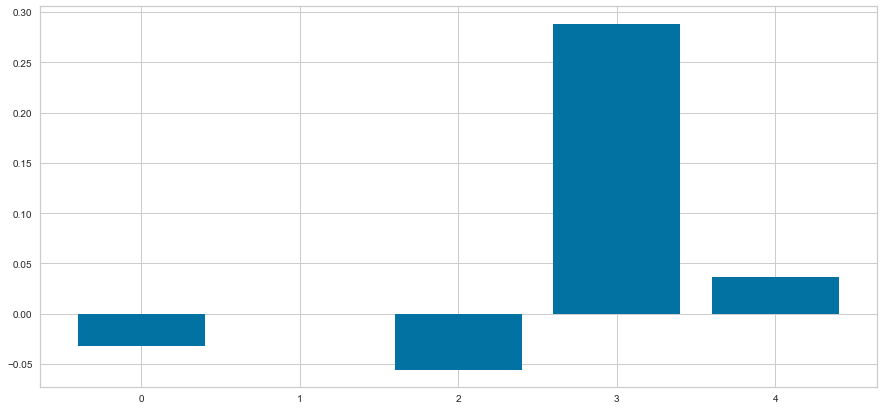

In [54]:
lin_importance=emp_sat_lin_model.coef_
for i,v in enumerate(lin_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(lin_importance))], lin_importance)
plt.show()

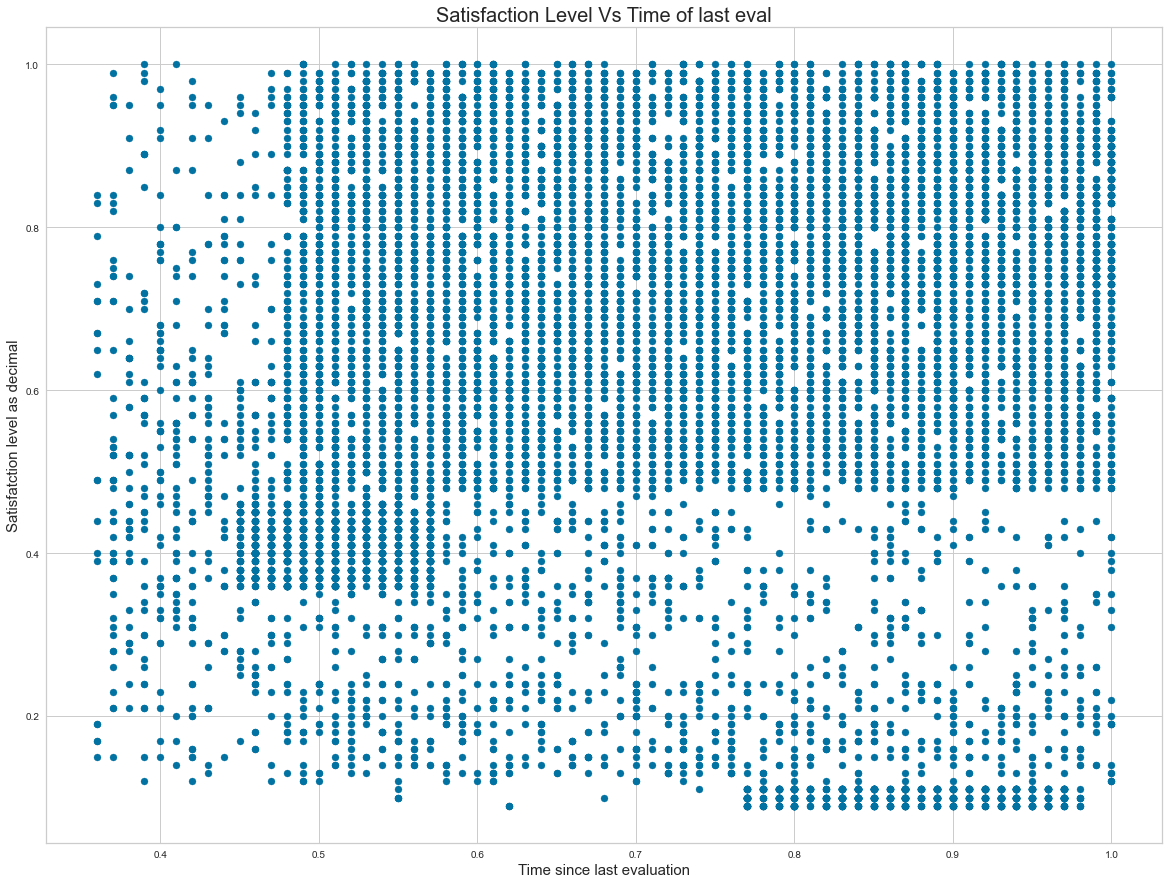

In [55]:
plt.rcParams['figure.figsize'] = (20,15) 
fig, axes = plt.subplots(nrows= 1, ncols = 1)
axes.scatter(emp_df['last_evaluation'], emp_df['satisfaction_level'])
axes.set_xlabel('Time since last evaluation', size = 15)
axes.set_ylabel('Satisfatction level as decimal', size = 15)
axes.set_title('Satisfaction Level Vs Time of last eval', size = 20)
plt.show()

#### *Based on the linear regression model it looks like the length of time from evaluations has the most significant positive effect on whether or not an employee would stay or leave the company. Based on the model and the graph above, it looks like the time from the last evaluation has a significant positive effect on the satisfaction level and the hours of communte of a significant negative impact on the satisfaciton level.* 

In [56]:
emp_df_model_features3 = ['time_spend_company', 'last_evaluation',]
emp_df_model_features_df3 = emp_df[emp_df_model_features3]
emp_df_model_target3 = emp_df[ 'satisfaction_level']
X_train3, X_test3, y_train3, y_test3 = train_test_split(emp_df_model_features_df3, emp_df_model_target3, test_size = 0.3, random_state = 11)

In [57]:
emp_sat_lin2 = LinearRegression()
emp_sat_lin2_model = emp_sat_lin.fit(X_train3, y_train3)

In [58]:
prediction2 = emp_sat_lin2_model.predict(X_test3)

In [59]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test3, prediction2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test3, prediction2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, prediction2)))

Mean Absolute Error: 0.20425885375220365
Mean Squared Error: 0.05976056759934134
Root Mean Squared Error: 0.2444597463782971
